# Plotting with Pandas and Matplotlib

### Objectives
After this lesson you should be able to ...
1. Plot directly with a DataFrame or Series object with the **`plot`** method
1. Plot using the pyplot interface of matplotlib with **`plt.plot`**
1. Plot using the object-oriented interface of matplotlib with **`fig, ax = plt.subplots...`**


### Prepare for this lesson by...
1. [Matplotlib homepage](http://matplotlib.org)
1. [Matplotlib Users Guide](http://matplotlib.org/contents.html)
1. [General Usage Notes](http://matplotlib.org/faq/usage_faq.html)
1. [Good video series tutorial on matplotlib](https://pythonprogramming.net/matplotlib-intro-tutorial/)
1. [List of all matplotlib modules - pyplot plus all others](http://matplotlib.org/py-modindex.html)
1. [Matplotlib Artist Tutorial](http://matplotlib.org/users/artists.html#artist-tutorial)
1. [All valid Markers for matplotlib](http://matplotlib.org/api/markers_api.html#module-matplotlib.markers)
1. [Good Tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

# Plotting in Pandas
Pandas makes plotting quite easy by automating much of the procedure for you. All pandas plotting passes through Python's main visualization library, **matplotlib** and is accessed through the DataFrame.plot or Series.plot method. We say that the pandas plot method is a 'wrapper' for matplotlib's **`pyplot.plt`** function.

For plots to be embedded in the notebook, you must run the magic command **`%matplotlib inline`**

In [1]:
# Start by importing pandas, matplotlib and running the ipython magic command
# the magic command puts plots in the browser and not in separate windows elsewhere
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Easily Grabbing Financial Data with Pandas
We can easily get financial time series data with very little work. The **`pandas_datareader`** package is a separate package from pandas and does not come preinstalled with the Anaconda distribution. You will have to go back to your command line and install it with `pip install pandas_datareader`. Once you have done so, you can continue with the rest of the tutorial.

## Putting pandas_datareader to use
There are currently several types of financial data that can be grabbed from the internet with pandas_datareader. For this tutorial, the daily price of publicly traded stocks will be retreived. For all of the available options please [visit the documentation](http://pandas.pydata.org/pandas-docs/stable/remote_data.html).

To get stock price data we will use the **`DataReader`** function in the **`data`** module from the **`pandas_datareader`** package. The **`DataReader`** function takes the ticker symbol, the website that has the data (yahoo or google finance) and the start and end date. The default start date is 1/1/2010. If no end date is given, you will get data until the last trading day. It returns the data nicely into your familiar pandas DataFrame.

In [2]:
from pandas_datareader import data

Get data from Apple, Facebook, Schlumberger and Tesla since beginning of 2014

In [3]:
# Grab the data from google!
# Every variable is a DataFrame
aapl = data.DataReader('aapl', 'google', start='2014-01')
fb = data.DataReader('fb', 'google', start='2014-01')
slb = data.DataReader('slb', 'google', start='2014-01')
tsla = data.DataReader('tsla', 'google', start='2014-01')

In [4]:
# Lets look at one of the stock DataFrames
# Along with the closing price, you get the opn, high, low and volume
aapl.head(15)

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,79.38,79.58,78.86,79.02,58791957
2014-01-03,78.98,79.10,77.20,77.28,98303870
2014-01-06,76.78,78.11,76.23,77.70,103359151
2014-01-07,77.76,77.99,76.85,77.15,79432766
2014-01-08,76.97,77.94,76.96,77.64,64686685
2014-01-09,78.11,78.12,76.48,76.65,69905199
2014-01-10,77.12,77.26,75.87,76.13,76320664
2014-01-13,75.70,77.50,75.70,76.53,94860843
2014-01-14,76.89,78.10,76.81,78.06,83734371


## Plotting one at a time with Pandas
Any numerical Series of data can be plotted with the **`.plot`** method in Pandas. This method actually accesses the **`matplotlib`** library and fills in matplotlib's **`pyplot.plot`** method for us. You will notice below that a line plot of stock prices has been defaulted but nowhere was it indicated that a line plot was to be drawn. Matplotlib will default to a line plot if no type of plot is given.

### Use a Pandas Series to get started
Instead of working with an entire DataFrame, our first examples will use just the closing prices of the stocks and so we will grab the 'Close' column first for each stock.

In [5]:
aapl = aapl['Close']
fb = fb['Close']
slb = slb['Close']
tsla = tsla['Close']

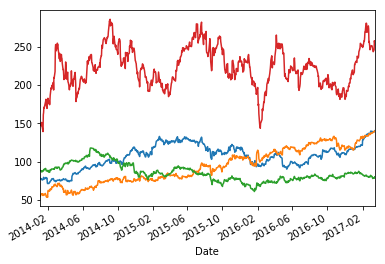

In [6]:
# the default plot method defaults to line plots
aapl.plot()
fb.plot()
slb.plot()
tsla.plot();
# sort of cool but very ugly

## Choosing other types of plots
Pandas directly uses Matplotlib for all of its plotting. Pandas does not have any plotting capabilities on its own. Pandas is simply calling Matplotlib's plotting functions and filling the arguments in those plotting functions for you. The types of available plots are available in [Pandas Series.plot documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) and set with the argument **`kind`**

* ‘line’ : line plot (default)
* ‘bar’ : vertical bar plot
* ‘barh’ : horizontal bar plot
* ‘hist’ : histogram
* ‘box’ : boxplot
* ‘kde’ : Kernel Density Estimation plot
* ‘density’ : same as ‘kde’
* ‘area’ : area plot
* ‘pie’ : pie plot

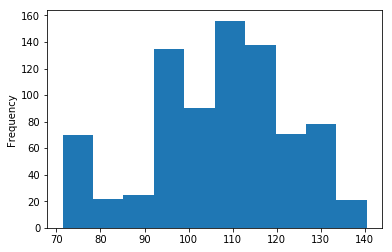

In [7]:
# Lets create a histogram
aapl.plot(kind='hist');

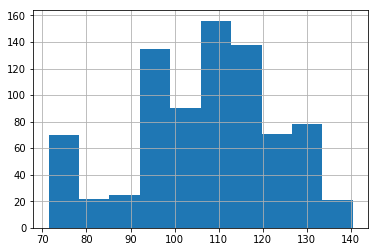

In [8]:
# pandas actually gives you direct access to making histograms through the `hist` method
aapl.hist();

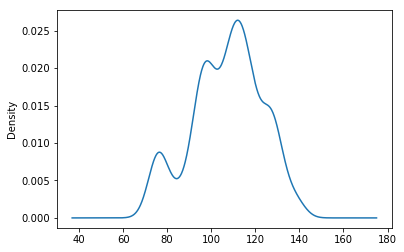

In [9]:
# A kernel density estimate gives a nice visualization of the distribution of prices
aapl.plot('kde');

## Additional Plotting Arguments
To modify your plots to your liking, matplotlib gives you lots of power. The most commonly used arguments are listed below but thre are [lots more](http://matplotlib.org/api/pyplot_api.html)

* **`linestyle`** (ls) - Pass a string of one of the following ['--', '-.', '-', ':']
* **`color`** (c) - Can take a string of a named color, a string of the hexadecimal characters or a rgb tuple with each number between 0 and 1. [Check out this really good stackoverflow post to see the colors](http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib)
* **`linewidth`** (lw) - controls thickness of line. Default is 1
* **`alpha`** - controls opacity with a number between 0 and 1
* **`figsize`** - a tuple used to control the size of the plot. (width, height) 
* **`legend`** - boolean to control legend

In [10]:
# Before we plot lets change the name of the Series from `Close` to `AAPL`
# This is done so the legend in the plot below is correct
aapl.name = 'AAPL'

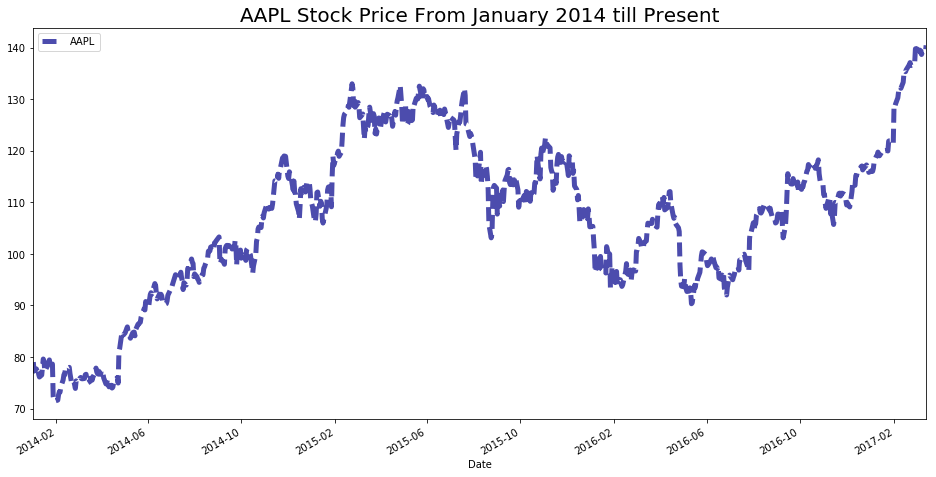

In [11]:
# Use several of the additional plotting arguemnts
aapl.plot(color="darkblue", 
          linestyle='--', 
          figsize=(16, 8), 
          linewidth=5, 
          alpha=.7, 
          legend=True)

#add a title
plt.title("AAPL Stock Price From January 2014 till Present", fontsize=20);

# Plots still Ugly?
If you can't get a plot to look how you would like, you can freely choose from several predefined layouts. These layouts can instantly make your plots more attractive.

In [12]:
# lets look at some styles we can choose from
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


In [13]:
# lets use a popular style - ggplot (also by Hadley Wickham)
plt.style.use('ggplot')

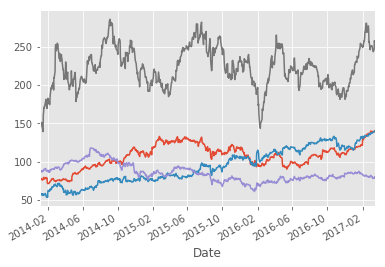

In [14]:
# use a semi-colon at the end of the last plotting line to prevent matplotlib text output
aapl.plot()
fb.plot()
slb.plot()
tsla.plot(); # see semicolon

# Plotting with a DataFrame and not a Series
All of the above plots were generated from the Series object. Similar plotting instructions exist for a DataFrame. Before we plot, we must create a DataFrame and we will automate that process below.

## Automate stock gathering process
A dictionary comprehension will be used to store the closing price of each stock as a pandas Series. The key to the dictionary will be the stock ticker symbol. This dictionary will be passed to the pandas DataFrame constructor. Each key will be the column name, the closing stock price will be the values and the date will be the index.

In [15]:
# create dictionary of ticker symbols and their stock prices from the start of 2014
stocks = ['aapl', 'fb', 'slb', 'tsla']
stock_dict = {stock : data.DataReader(stock, 'google', start='2014-01')['Close'] for stock in stocks}

In [16]:
# Create pandas DataFrame from the dictionary of stocks
df_stocks = pd.DataFrame(stock_dict)
df_stocks.head(15)

,aapl,fb,slb,tsla
Date,,,,
2014-01-02,79.02,54.71,88.82,150.10
2014-01-03,77.28,54.56,88.35,149.56
2014-01-06,77.70,57.20,88.02,147.00
2014-01-07,77.15,57.92,87.51,149.36
2014-01-08,77.64,58.23,86.98,151.28
2014-01-09,76.65,57.22,86.48,147.53
2014-01-10,76.13,57.94,88.17,145.72
2014-01-13,76.53,55.91,87.46,139.34
2014-01-14,78.06,57.74,88.87,161.27


# Plotting with Pandas
Pandas adds a legend for every column in the DataFrame that is plotted. Plots can be modified tremendously to get the look that you want. Check out a few of them below.

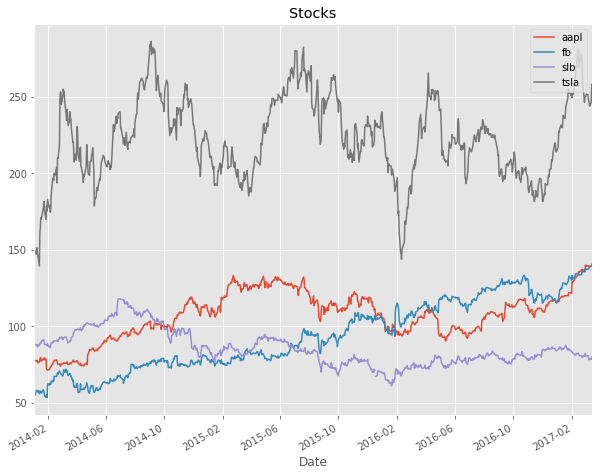

In [17]:
df_stocks.plot(figsize=(10,8), title='Stocks').legend(loc=1)

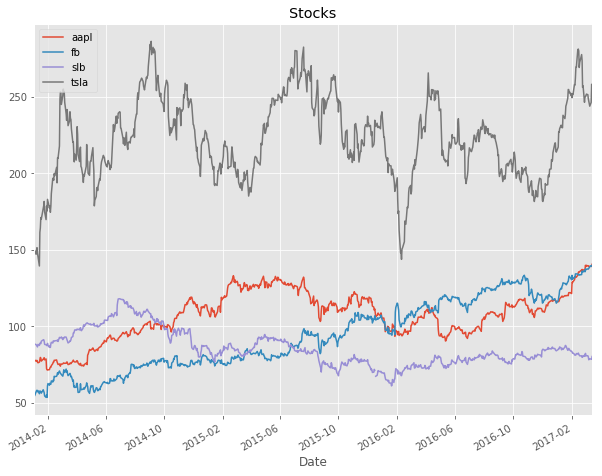

In [18]:
# A legend comes for free since the columns are already appropriately named
ax = df_stocks.plot(figsize=(10,8), title='Stocks')

# more on this later - ignore for now
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper left')

### Legend Location
pandas does not give direct access to change the legend within its **`plot`**. You must use matplotlib directly. See [this stackoverflow post](http://stackoverflow.com/questions/11348183/pandas-bar-plot-with-specific-colors-and-legend-location).

### Alternate syntax

Instead of specificying the type of plot desired with the **`kind`** argument, it is possible to directly access the plot type through a specific method. See the output of the **dir** command below. These are the same plots that could be placed in the **`plot`** method.

In [19]:
print([method for method in dir(df_stocks.plot) if method[0] != '_'])

['area', 'bar', 'barh', 'box', 'density', 'hexbin', 'hist', 'kde', 'line', 'pie', 'scatter']


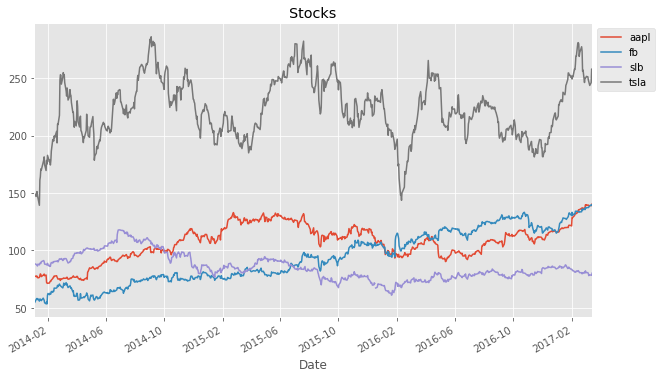

In [20]:
# another way to change the legend
df_stocks.plot.line(figsize=(10,6), title='Stocks').legend(bbox_to_anchor=(1, 1)); 

### New Dataset
A very popular intro dataset for the very famous **`ggplot2`** package in R is the diamonds dataset with [description here.](http://docs.ggplot2.org/0.9.3.1/diamonds.html)

In [21]:
diamonds = pd.read_csv('data/diamonds.csv')

In [22]:
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### Changing the defaults for a scatterplot

The default plot is a line plot and uses the index as the x-axis and each column of the frame as the value for the y-axis. This wokred well for stock price data where the date was in the index and ordered. For many datasets, you will have to explicitly set the x and y axis variables. Below is a scatterplot comparison of carat vs price.

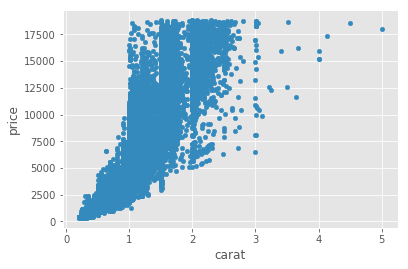

In [23]:
diamonds.plot('carat', 'price', kind='scatter');

### Removing blank space by changing plotting limits
Empty space is generally frowned upon when plotting. In the above plot, it is senseless to have negative carats or prices so we can set the limits of the plot with **`ylim`** and **`xlim`**.


### Fixed for matplotlib 2.0
When this notebook was originally written the current version of matplotlib was 1.5. This version did not use good defaults for x/y limits and more empty space was present in the graph. Matplotlib 2.0 was released Feb 20, 2017 and many of the defaults have changed.

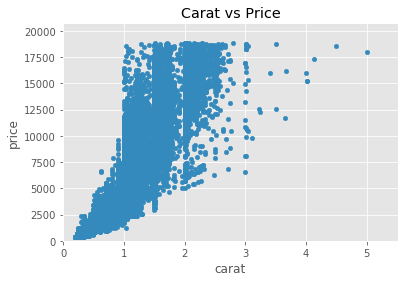

In [24]:
# remove some whitespace - not necessary now, but this is still how you change the x/y limits
diamonds.plot(x='carat',
             y ='price',
             kind='scatter',
             xlim=(0, diamonds.carat.max() * 1.1),
             ylim=(0, diamonds.price.max() * 1.1),
             title='Carat vs Price');

### Change color based on a column
It is possible to use the value of a different column to change colors of the points. To do this, the value of the color must be saved into a sequence beforehand. Every value in the column chosen to color must be mapped to a specific color string.

In [25]:
diamonds.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [26]:
# make a mapping
color_map = {'E':'aqua', 'I':'green', 'J':'black', 'H':'cadetblue', 'F':'darksalmon',
            'G':'lavender', 'D':'maroon'}

### Using the `map` Series method
The **`map`** Series method iterates over a column of data and returns a single value for each cell.  **`map`** can accept a function or a dictionary. If a dictionary is passed then a simple key lookup is used to return the value.

In [27]:
# map the color values to color strings
color_strings = diamonds['color'].map(color_map)

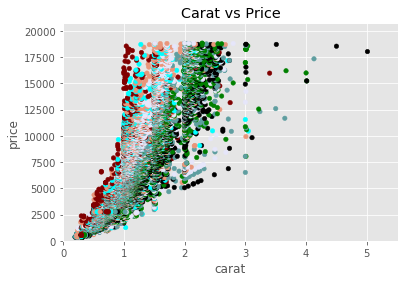

In [28]:
# must use the argument 'c' when doing a scatterplot. Yes, that's an annoying fact but
# its in the docstrings
diamonds.plot(x='carat',
             y ='price',
             kind='scatter',
             xlim=(0, diamonds.carat.max() * 1.1),
             ylim=(0, diamonds.price.max() * 1.1),
             title='Carat vs Price',
             c=color_strings);

### The index becomes the Tick Values
Pandas nicely integrates the index into plotting by using it as the tick mark labels for many plots.

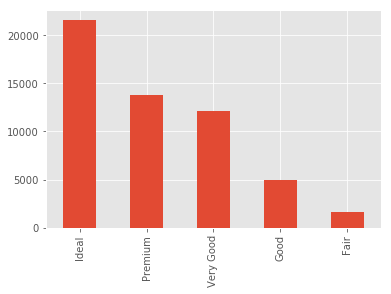

In [29]:
# make a bar plot
diamonds['cut'].value_counts().plot(kind='bar');

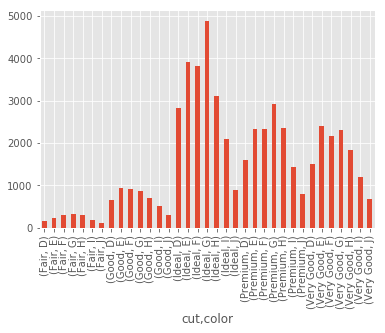

In [30]:
# bar plot with more than one category
diamonds.groupby(['cut', 'color'])['cut'].count().plot(kind='bar');

### Use columns and index to color different bars
The above plot is a bit terrible. There is no differentiation between groups. We can **`unstack`** one of the grouped levels to take advantage of the column names used in the legend.

In [31]:
diamonds.groupby(['cut', 'color'])['cut'].count().unstack('color')

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


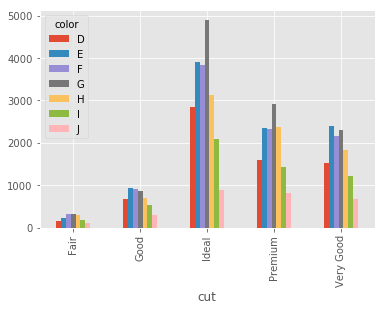

In [32]:
# bar plot using index and columns
diamonds.groupby(['cut', 'color'])['cut'].count().unstack('color').plot(kind='bar')

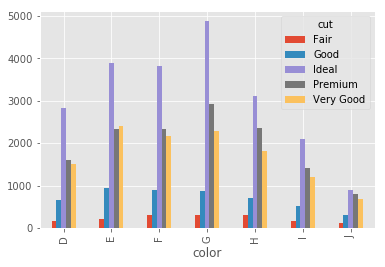

In [33]:
# bar plot unstacking the other level
diamonds.groupby(['cut', 'color'])['cut'].count().unstack('cut').plot(kind='bar')

In [34]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Reaching the limits of Pandas Plotting
The **`plot`** Series and DataFrame method is just a convenience and cannot be used to make more sophisticated plots. The **`matplotlib`** library can be used to control every imaginable piece of the plot. It is extremely flexible and very powerful.

But because of its extreme flexibility it can take some time to build nice custom plots. Other libraries have been built on top of **`matplotlib`** to give the user more immediate plotting power. The most popular library is **`seaborn`** which will be introduced further down below. But before we hit the easy button with **`seaborn`** we will dive into the fundamentals of **`matplotlib`**.

Matplotlib has extensive documentation and many guides and tutorials are available. See the [beginners Guide.](http://matplotlib.org/users/tutorials.html)

### Matplotlib Overview
Our main interactions with **`matplotlib`** will take place through its **`pyplot`** which provides a MATLAB-like plotting framework. There is much more to matplotlib outside of the pyplot module ([see a list of all matplotlib modules](http://matplotlib.org/py-modindex.html)) but it is this top layer of the library and easiest to interact with.

There are a few very important concepts that will be outlined below before any of the plotting starts. I strongly recommend that you read the [usage FAQ](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure) to completely understand the most fundamental parts of the library. A few of these parts will be covered below.

### Figure vs Axes vs Axis

There is some key terminology that must be understood.

The **Figure** is the outer container for all the individual plots that you will create. Individual plots are called **Axes** and you can create as many as you would like in a single figure. Each axes must be contained in a single figure. **Axes** are not mathematical **axis** even though the words are similar. An **Axis** is your normal mathematical x or y (or other higher dimensional) axis.

Every element (line, text, axes, figure, etc...) of matplotlib is represented by an **artist** but this is only a technical detail for now. Understanding what a figure, axes and axis are is what is important.

![figure vs axes vs axis](./images/fig_map.png)

### Another representation of all the components of a matplotlib plot

![new figure](./images/figure_parts.png)

### Getting Started with Matplotlib

Matplotlib is divided into two hierarchies. The top level hierarchy and the one that you will begin your matplot career involves directly calling the **pyplot** module. This module "provides the state-machine interface to the underlying object-oriented plotting library". This means that pyplot handles the current figure and current axes for you. The interface for pyplot mirrors what matlab does.

### Object-oriented Interface
One level down the hierarchy is the object-oriented interface where you get much more control on all the elements in the plot. You can grab on to specific elements of the plot and manually manipulate them. Object-oriented should clue you in that the **dot notation** will be heavily used.

In [35]:
# bring in pyplot and alias it to plt
import matplotlib.pyplot as plt

The default behavior of ipython notebooks is to not embed the plots directly into the notebooks. Use the following magic command to embed.

In [36]:
%matplotlib inline

### Basic Plotting
The basic method of plotting involves making heavy use of the **`plt.plot`** function and other functions following **`plt.`** Plotting elements will be continually added to the plot until the code chunk is finished. 

Even though matplotlib handles python objects well, it's best to pass **numpy arrays** as the data. Convert pandas objects to numpy objects with the **.values** attribute.

The **`plt.plot`** function defaults to a line plot and when given a single argument will use it as the **y** coordinate and default x to a 0-indexed range.

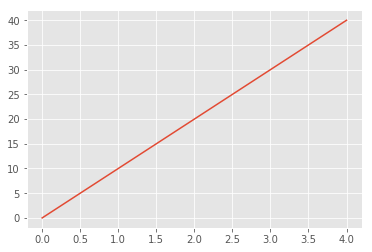

In [37]:
# simple plot
y = np.arange(5) * 10

plt.plot(y)

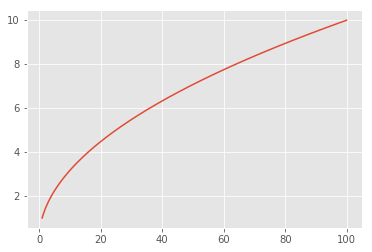

In [38]:
# specify x and y
x = np.arange(1, 100, .1) # start, stop, step
y = np.sqrt(x)
plt.plot(x, y)

### Continually add elements
The first call to **plot** creates a figure and an axes and then draws the plot with both x and y axis (and z axis if 3D).  

Continual calling of the **`plot`** function will keep adding elements to the current figure and axes. Subsequent calls simply add to the active figure and axes.

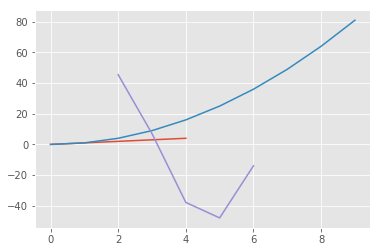

In [39]:
plt.plot(np.arange(5))
plt.plot(np.arange(10)**2)
plt.plot(np.arange(2,7), np.sin(np.arange(2,7)) * 50)

### Older Conventions of Matplotlib
Some older tutorials might talk about **pylab**. This was historically used as a convenience module to import all of pyplot and numpy into the namespace. This is typically a terrible idea as it completely polutes your namespace with many unnecessary unbound (to a module) functions. You should always begin interacting with matplotlib through pyplot.

### Artists
[From the documentation](http://matplotlib.org/users/artists.html#artist-tutorial) : "There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure). The standard use is to create a Figure instance, use the Figure to create one or more Axes or Subplot instances, and use the Axes instance helper methods to create the primitives."

### Quickly change color and linestyle

**pyplot** offers a very fast way to change the color and the type of line drawn with the third (or second) positional argument. This argument is a string that takes the form of one character for a color followed by one or two characters for the line style. The available colors and linestyles are found in the documentation in an html table - which is perfect for the **`read_html`** function to grab and put in the notebook

In [40]:
# grab all tables in the pyplot api doc
tables = pd.read_html('http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot')

In [41]:
# get only tables that have the word charater in the column
char_tables = [table for table in tables if 'character' in table.columns]

In [42]:
# here are the possible colors
char_tables[1]

,character,color
0,‘b’,blue
1,‘g’,green
2,‘r’,red
3,‘c’,cyan
4,‘m’,magenta
5,‘y’,yellow
6,‘k’,black
7,‘w’,white


In [43]:
# here are the possible line styles
char_tables[0]

,character,description
0,'-',solid line style
1,'--',dashed line style
2,'-.',dash-dot line style
3,':',dotted line style
4,'.',point marker
5,"','",pixel marker
6,'o',circle marker
7,'v',triangle_down marker
8,'^',triangle_up marker
9,'<',triangle_left marker


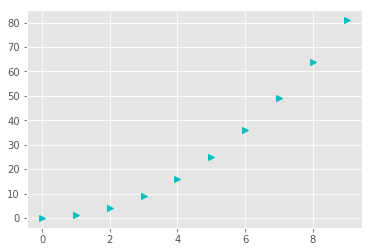

In [44]:
# concatenate a color and a line style to quickly change the plot

x = np.arange(10)
y = np.arange(10) ** 2
plt.plot(x, y, 'c>')

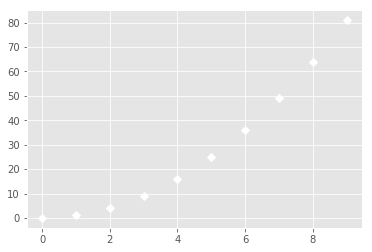

In [45]:
# white diamond
plt.plot(x, y, 'wD')

### Multiple plots with one line of code - strange syntax
It is possible to add many lines with one line of code by simply separating them with commas. Providing the x value is optional as the default is just an array from 0 to length of y -1.

Also optional is the **`color`** and **`linestyle`**. Only one can be provided.

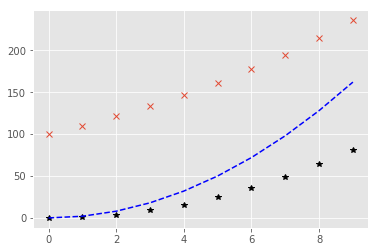

In [46]:
plt.plot(x, y, 'k*', 2*y, 'b--', x, 1.1**x * 100, 'x')

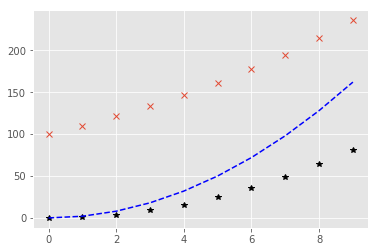

In [47]:
# same plot as above but more verbose
# can use aliases for some of the arguments
plt.plot(x, y, color='k', marker='*', linestyle=' ')
plt.plot(2*y, c='b', ls='--')
plt.plot(1.1**x * 100, marker='x', ls ='')

### More examples
Check the [pyplot documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) for all possible arguments.

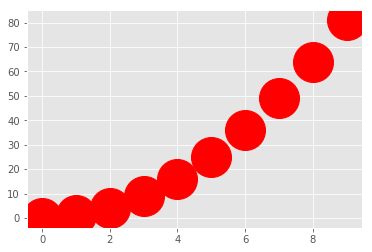

In [48]:
# change marker size
plt.plot(np.arange(10)**2, 'ro', ms=40);

### List of all options for plot
**`pyplot.plot`** comes with around 40 different options you can pass to it. [Check the docs for exact usage.](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) The options are printed out in the table below.

In [49]:
table_line = pd.read_html('http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D')

In [50]:
table_line[0]

,Property,Description
0,agg_filter,unknown
1,alpha,float (0.0 transparent through 1.0 opaque)
2,animated,[True | False]
3,antialiased or aa,[True | False]
4,axes,an Axes instance
5,clip_box,a matplotlib.transforms.Bbox instance
6,clip_on,[True | False]
7,clip_path,"[ (Path, Transform) | Patch | None ]"
8,color or c,any matplotlib color
9,contains,a callable function


### Pandas DataFrame Integration
There is an additional keyword argument **`data`** that can be used to pass a pandas dataframe. This way, the columns can be directly used by **pyplot.plot** as strings.

### Matplotlib Defaults
There are many dozens of default parameters that matplotlib sets upon import. These defaults are stored in a dictionary found with **`plt.rcParams`**.

### Changing the defaults
You have the power to modify these defaults to a different value by simply setting the value in the dictionary. For instance, the default figure size is **`[6, 4]`**. Let's change this.

In [51]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#E5E5E5',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
     

In [52]:
# get default figure
plt.rcParams['figure.figsize']

[6.0, 4.0]

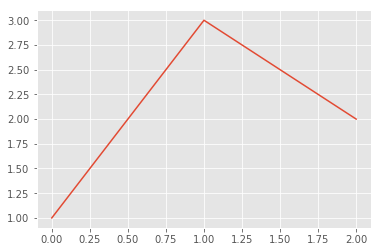

In [53]:
# before change in defaults
plt.plot([1,3,2])

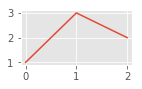

In [54]:
# change defaults
plt.rcParams['figure.figsize'] = [2, 1]

plt.plot([1,3,2])

In [55]:
# restore defaults
plt.rcdefaults()

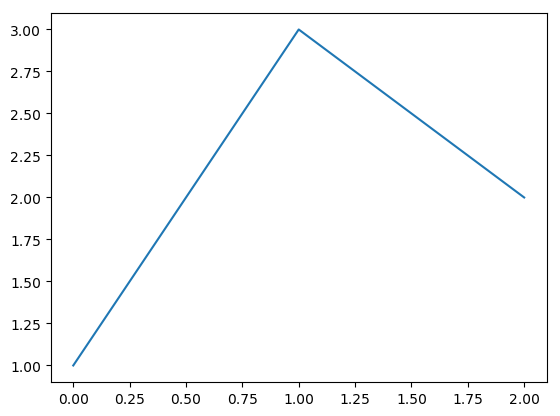

In [56]:
plt.plot([1,3,2])

In [57]:
# looks like ggplot style changed the figsize default
plt.rcParams['figure.figsize']

[6.4, 4.8]

In [58]:
# go back to ggplot
plt.style.use('ggplot')

In [59]:
# load in diamonds
diamonds = pd.read_csv('data/diamonds.csv')

### Use many plotting options at once
It is possible to highly customize your plot with many different plotting options. Notice here the figsize changed during the figure creation during the call to **`plt.figure`**

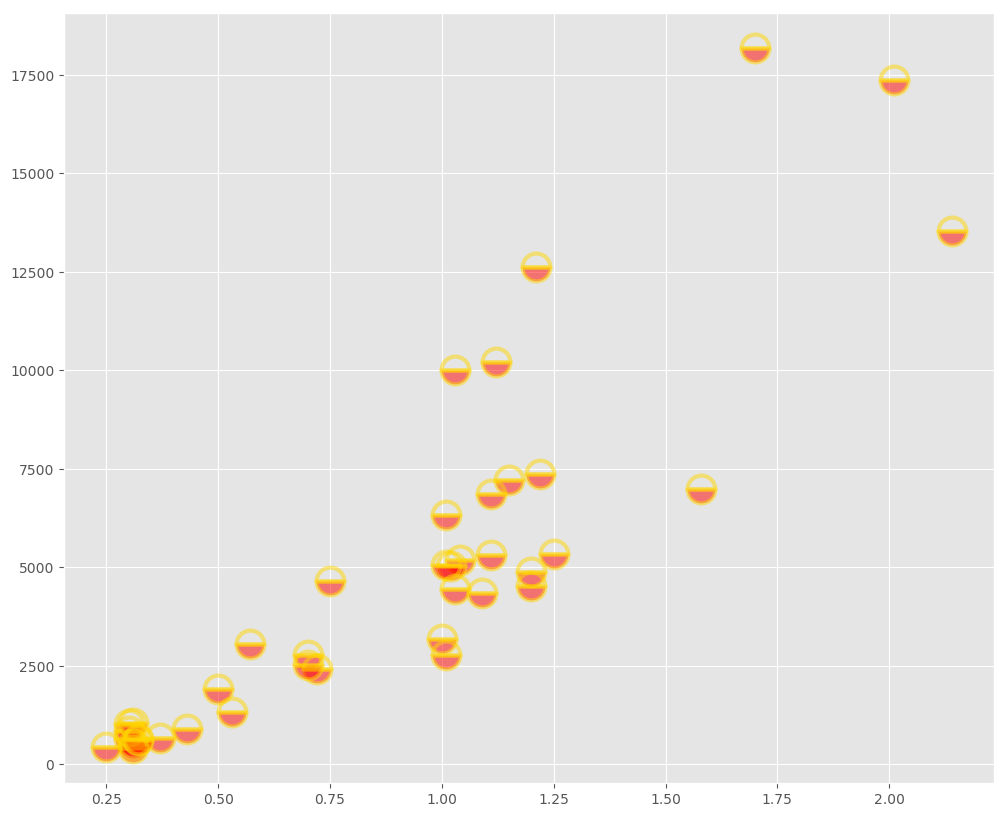

In [60]:
plt.figure(figsize=(12,10))
plt.plot('carat', 'price', 
         data=diamonds.sample(40), 
         linestyle='',
         marker = 'o', 
         c='r', 
         fillstyle='bottom',
         markersize=20,
         markeredgecolor='gold',
         markeredgewidth=3,
         alpha=.5)

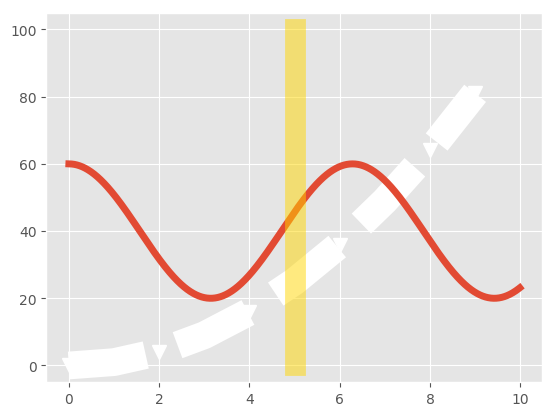

In [61]:
# change the width of the line
plt.plot(np.arange(10)**2, 'wv--', ms=10, linewidth=20)

# abbreviate line width with lw
x = np.arange(0, 10, .01)
y = np.cos(x) * 20 + 40
plt.plot(x, y, lw=5)

# make transparent with alpha (0-1)
x = np.ones(6) * 5
y = np.linspace(0, 100, 6)
plt.plot(x, y, c='gold', lw=15, alpha=.5);

### Current Figure and Axes
At any one time there is always one *current* figure and one *current* axes. The current figure and axes is where the next plotting element will be added. Thus far, only one figure and one axes have been used and you never have to worry about which figure or axes you are plotting to.

### Explicitly change the figure
It is possible to create a new figure and make it current with **`plt.figure`** which accepts an integer or a string as the name of the figure. The commands below plot the same exact elements as above except do so on different figures.

1. A new figure is explicitly created with **`plt.figure`** and named 1. The white triangle lines are plotted
2. Another figure is explicitly created and named 2. The red sine curve is plotted.
3. The current figure is switched back to the figure named 1. The gold stripe down the middle is plotted.

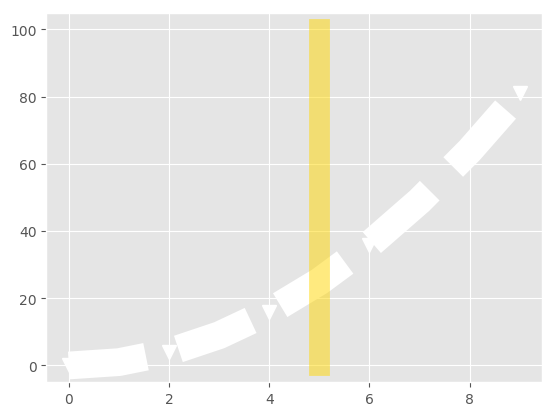

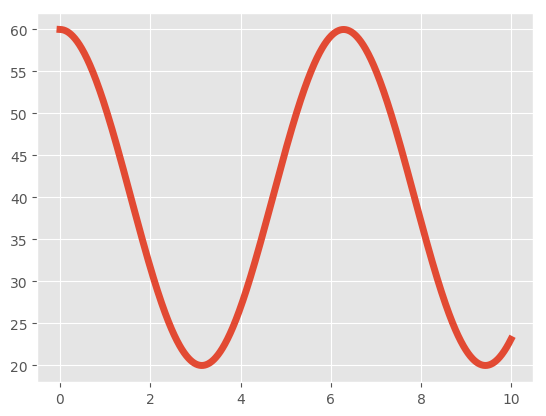

In [62]:
# change the width of the line
plt.figure(1)
plt.plot(np.arange(10)**2, 'wv--', ms=10, linewidth=20)

plt.figure(2)
# abbreviate line width with lw
x = np.arange(0, 10, .01)
y = np.cos(x) * 20 + 40
plt.plot(x, y, lw=5)

plt.figure(1)
# make transparent with alpha (0-1)
x = np.ones(6) * 5
y = np.linspace(0, 100, 6)
plt.plot(x, y, c='gold', lw=15, alpha=.5);

### More than one axes

The last example created entire new figures which is uncommon. More common is to create a new axes with the **`subplot`** function. This function is most commonly used to create a grid of many different **axes** (plotting areas). 

The **`subplot`** function normally takes 3 arguments: the number of rows, columns and the active plot number. The active plot number is the index of the plot starting at one and counting from left to right. Calling the **`subpplot`** function will change the current axes to the plot number.

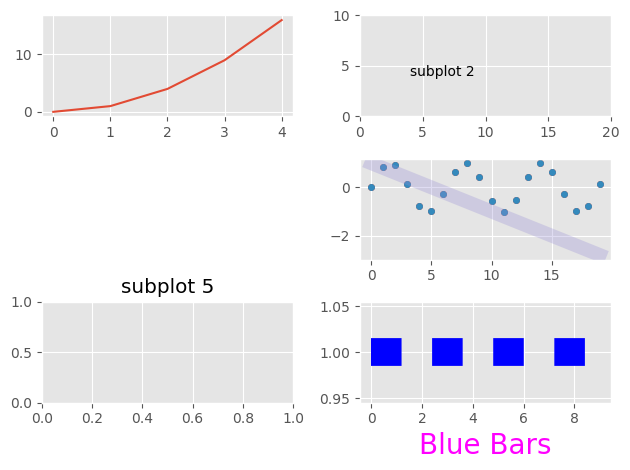

In [63]:
plt.subplot(3,2,1) # create a 3 by 2 grid and activate the first subplot for plotting
plt.plot(np.arange(5) ** 2) # draw on the first subplot - the one in the upper left hand corner


plt.subplot(3,2,2) # activate the second subplot - in the upper right hand corner
plt.text(4, 4,"subplot 2") # add text to specific x,y location
plt.axis([0,20, 0,10])   # change axis


plt.subplot(3,2,4) # activate the middle right axes
x = np.arange(20)
y = np.sin(x)

plt.plot(x, y, 'o', ms=4)
plt.plot(x, y, 'o', ms=4)
plt.plot(x, -.2 * x + 1, lw=10, alpha=.3)


plt.subplot(3,2,5)
plt.title("subplot 5")

plt.subplot(3,2,6)
plt.plot(np.ones(10), c='blue', ls=':', lw=20)
plt.xlabel('Blue Bars', fontsize=20, color='magenta'); # add a lable to the x axis

# automatically adjusts subplots so they are nicely spaced
plt.tight_layout()

The third subplot was never activated and so was left blank.

### Title and Labels and text/annotate
Titles to each axes are added with **plt.title**. Can change **fontsize, fontweight**, etc... The title for the entire figure can be changed with **plt.suptitle**. Labels for x and y axis can be set with **plt.xlabel, plt.ylabel**

Text can be added with **plt.text** or similarly but with much more flexibility with **plt.annotate**. 

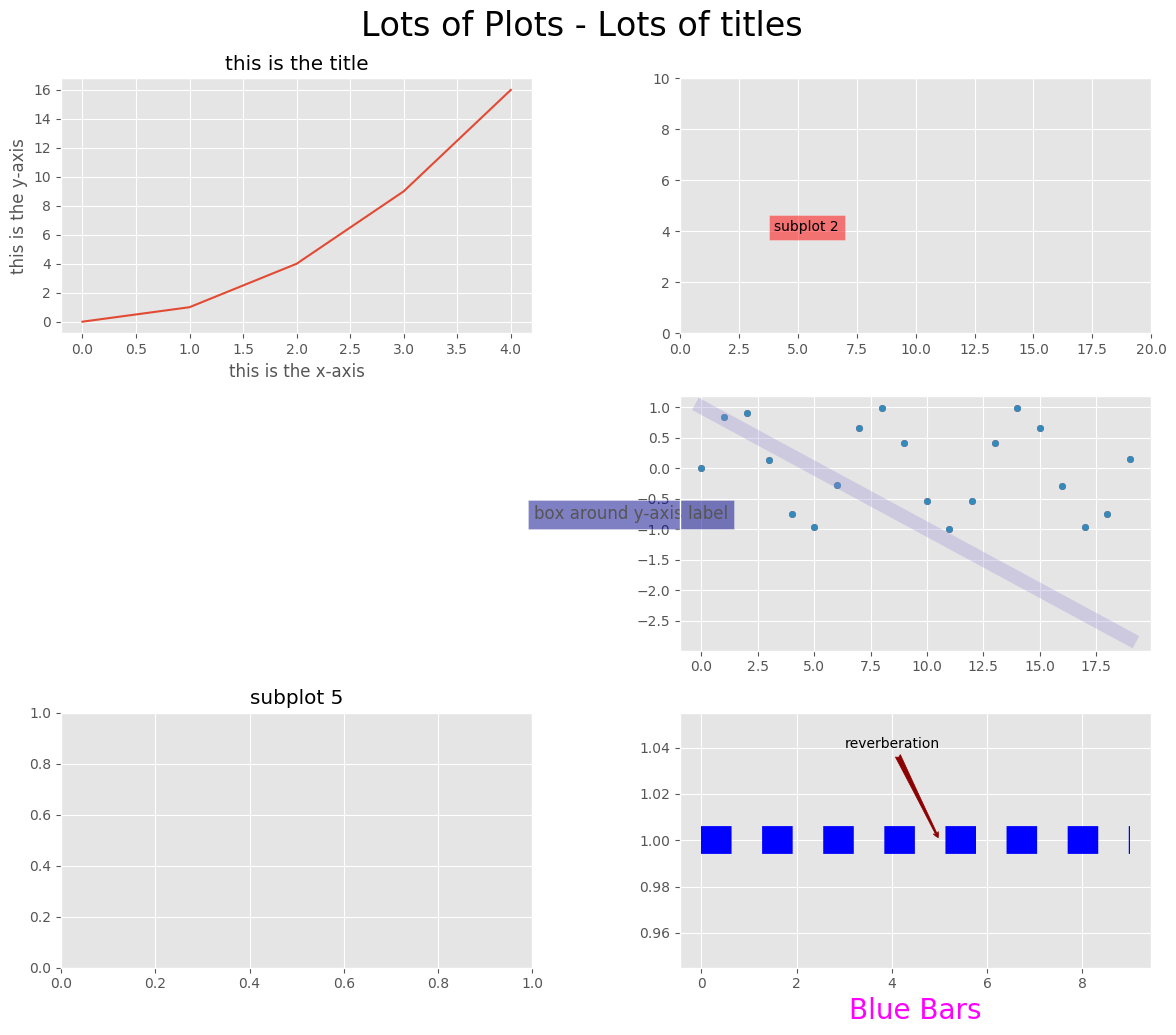

In [64]:
plt.figure(figsize=(12,10))
plt.title('asdf')
plt.subplot(3,2,1) # create a 3 by 2 grid and activate the first subplot for plotting
plt.plot(np.arange(5) ** 2) # draw on the first subplot - the one in the upper left hand corner
plt.ylabel('this is the y-axis')
plt.xlabel('this is the x-axis')
plt.title('this is the title')

plt.subplot(3,2,2) # activate the second subplot - in the upper right hand corner
plt.text(4, 4,"subplot 2", bbox=dict(facecolor='red', alpha=0.5)) # add text to specific x,y location
plt.axis([0,20, 0,10])   # change axis


plt.subplot(3,2,4) # activate the middle right axes
x = np.arange(20)
y = np.sin(x)

plt.plot(x, y, 'o', ms=4)
plt.plot(x, y, 'o', ms=4)
plt.plot(x, -.2 * x + 1, lw=10, alpha=.3)
plt.ylabel('box around y-axis label', bbox=dict(facecolor='darkblue', alpha=0.5), rotation='horizontal', x=4)


plt.subplot(3,2,5)
plt.title("subplot 5")

plt.subplot(3,2,6)
plt.plot(np.ones(10), c='blue', ls=':', lw=20)
plt.xlabel('Blue Bars', fontsize=20, color='magenta'); # add a lable to the x axis
plt.annotate('reverberation', 
         xy=(5, 1),  
        xytext=(3,1.04),
        xycoords='data',
         arrowprops=dict(arrowstyle="fancy", color='darkred'))

# title for figure. Have to manually adjust it
plt.suptitle('Lots of Plots - Lots of titles', fontsize=24, y=1.03)


# automatically adjusts subplots so they are nicely spaced
plt.tight_layout()

### Bar Plots
Thus far only the default **line** plots have been used. Some line plots do turn into scatter plots when changing the **linestyle**. Bar plots have to be carefully constructed with matplotlib unlike pandas which automatically tunes matplotlib parameters to make it look nice.

Let's first examine a bar plot straight from pandas and then attempt to recreate it with matplotlib.

In [65]:
# read in coh data
coh = pd.read_csv('data/coh_employee.csv')

In [66]:
coh_fm = coh.pivot_table(index='DEPARTMENT', columns='GENDER', aggfunc='size')\
   .query('Female + Male > 40')
coh_fm

GENDER,Female,Male
DEPARTMENT,,
Health & Human Services,83.0,27.0
Houston Airport System (HAS),36.0,70.0
Houston Fire Department (HFD),21.0,363.0
Houston Police Department-HPD,155.0,483.0
Parks & Recreation,23.0,51.0
Public Works & Engineering-PWE,108.0,235.0
Solid Waste Management,9.0,34.0


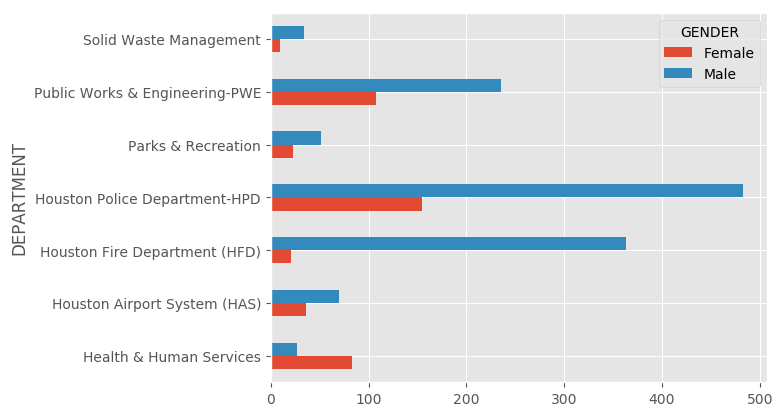

In [67]:
# ezpz
coh_fm.plot(kind='barh')

### Recreating with matplotlib
The **`pyplot.barh`** command makes horizontal bar plots. You must pass it the exact location on the y axis where to be begin the bar. The width of the bar would be the values in the above DataFrame. The thickness of the bar is controlled by the **height** parameter. A vertical bar plot is done very similarly with **pyplot.bar**.

### Creating a legend
In **`pyplot.plot`** the **label** is used to denote the string value for the legend. The **pyplot.legend** function is then called to actually make the legend display. The tick labels can be changed with the **pyplot.yticks** command. The exact color that pandas used was found with an object-oriented approach discussed below.

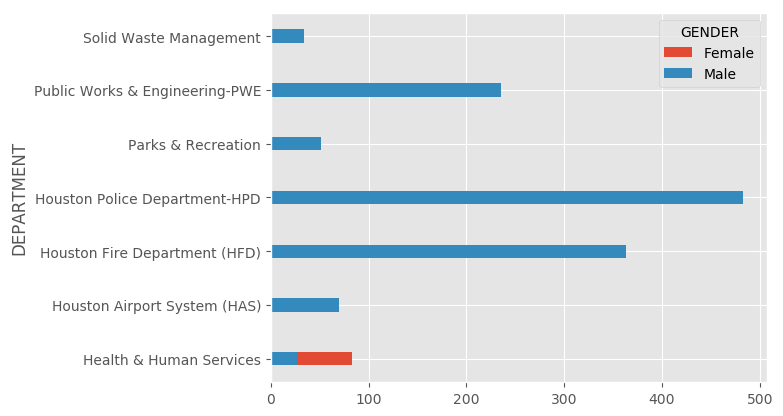

In [68]:
n = len(coh_fm)
plt.barh(bottom=np.arange(n), width=coh_fm.values[:, 0], height=-.25, color=(0.8862, 0.2901, 0.2, 1.0), label='Female')
plt.barh(bottom=np.arange(n), width=coh_fm.values[:, 1], height=.25, color=(0.204, 0.541, 0.741), label='Male')
plt.legend(title='GENDER')
plt.yticks(np.arange(n), coh_fm.index.values, size='10')
plt.ylabel('DEPARTMENT');

### Histograms
Matplotlib has a nice function **plt.hist** to create to histograms. The **normed** parameter can be very useful to create a distribution that sums to one.

In [69]:
coh = pd.read_csv('data/coh_employee.csv')

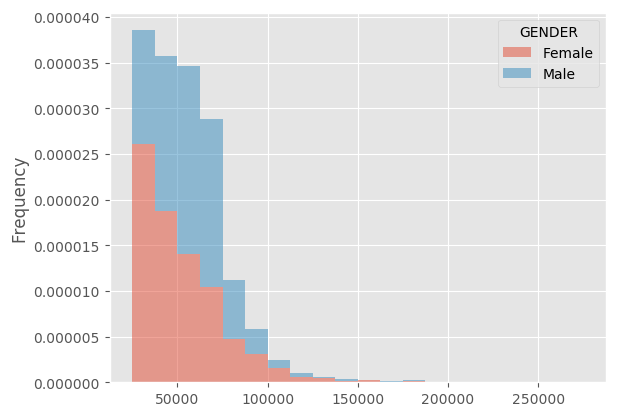

In [70]:
# pandas
coh.pivot(columns='GENDER', values='BASE_SALARY').plot(kind='hist', alpha=.5,bins=20, normed=True, stacked=True)

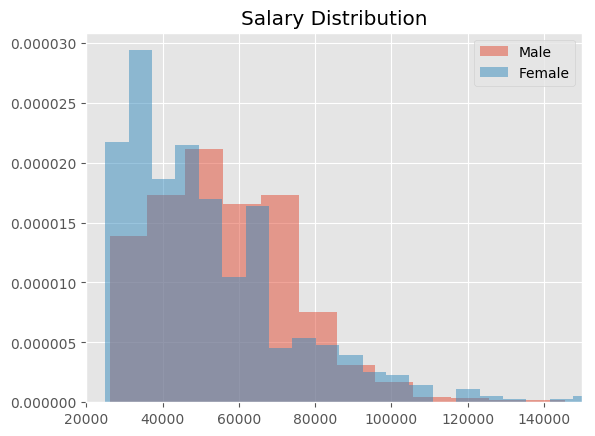

In [71]:
male = coh[(coh['BASE_SALARY'].isnull() == False) & (coh.GENDER == 'Male')]

female = coh[(coh['BASE_SALARY'].isnull() == False) & (coh.GENDER == 'Female')]

plt.hist('BASE_SALARY', 
         data=male, 
         normed=True,
         bins=25,
        alpha=.5,
        label='Male')

plt.hist('BASE_SALARY', 
         data=female,
         normed=True,
         bins=25,
        alpha=.5,
        label='Female')

plt.xlim(20000, 150000)
plt.legend()
plt.title("Salary Distribution")

### Scatter Plots
Even though **pyplot.plot** can be used to produced what are essentially scatter plots, matplotlib has a more direct facility to produce them with the **pyplot.scatter** function.

One difference is the ability to plot different sizes of points for each point.

In [72]:
x = np.sin(np.arange(-10, 10, .1))
y = np.cos(np.arange(-10, 10, .1))

In [73]:
y1 = y * np.cumproduct(np.ones(len(x)) * .993)
x1 = x * np.cumproduct(np.ones(len(x)) * .993)
s = 200 * np.cumproduct(np.ones(len(x)) * .99)
c = np.cumproduct(np.ones(len(x)) * .99)

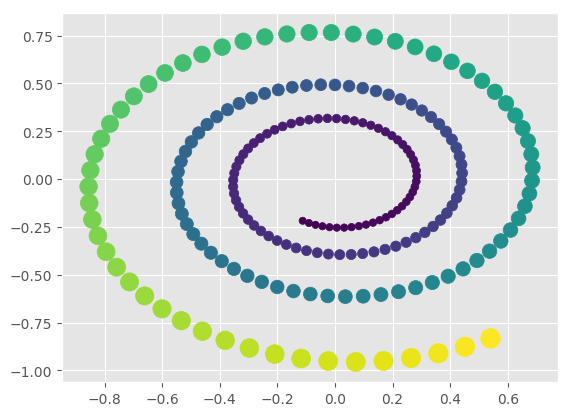

In [74]:
plt.scatter(x1, y1, s=s, c=c)

# An object oriented approach. Using methods and not Matplotlib functions.

An alternative method to continually calling **`pyplot`** with **`plt.`** exists. It is possible to assign the figure and each axes to variables and then use the dot notation to add to the plots. Below we will showcase this method by first creating a figure and then manually adding an axes to it.

To plot, each axis will call its own plotting methods. This object oriented approach removes the need to call functions with **`plt`**. You use the methods attached to the objects you create - mostly just the axes objects.

In [75]:
# manually create a figure
fig = plt.figure(1)

print(type(fig))

<class 'matplotlib.figure.Figure'>


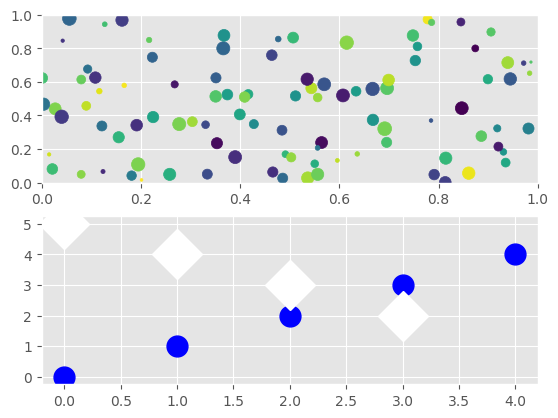

In [76]:
# add a subplot with the figure object
# the plot method of the axes method works very similarly to the plt.plot function
fig = plt.figure(1)

# create the axes and assign to variable
ax2 = fig.add_subplot(2, 1, 2)

# use the axes directly with the object oriented approach.
ax2.plot(np.arange(5), 'bo', ms=15)
ax2.plot(np.arange(5,1,-1), 'wD', ms=25)

# create a new axes in the first position
ax1 = fig.add_subplot(2, 1, 1)

# generate random points, random colors and random marker size
ax1.scatter(np.random.rand(100,1), np.random.rand(100), 
            c=np.random.rand(100), 
            s=np.random.randint(3,100, 100))
ax1.set_ylim(0,1)
ax1.set_xlim(0,1);

### Use `subplots` to add many axes at once
The figure and axes can be created at the same time with **`plt.subplots`**. It is called generally with a row and column number representing and returns a **tuple**. The first value of the tuple is a figure and second value is an array of axes in the same shape as the rows and columns given in the function.

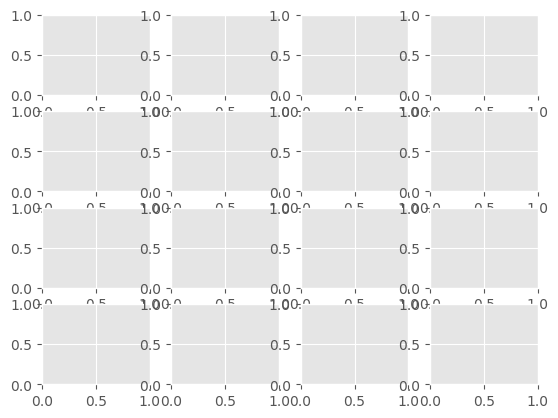

In [77]:
# create figure and array of axes using subplots
fig, ax_array = plt.subplots(4,4)

In [78]:
type(fig)

matplotlib.figure.Figure

In [79]:
type(ax_array)

numpy.ndarray

In [80]:
ax_array.shape

(4, 4)

In [81]:
# examine first row of axes
# still an array - of that row
ax_array[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D9ADEB4A8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000021D9DB1B048>], dtype=object)

In [82]:
# finally, choose a single axes
type(ax_array[0, 0])

matplotlib.axes._subplots.AxesSubplot

### Updating a figure not in code block
Now that we have identified how to select an axes from the numpy array we can start plotting. But, what happened to our figure that was declared above? It turns out that the axes is still apart of the same figure its just not visually seen updating immediately.

In [83]:
# draw something on the axis
# nothing happened?!
ax_array[0, 0].plot(np.arange(5), c='yellow', lw=10);

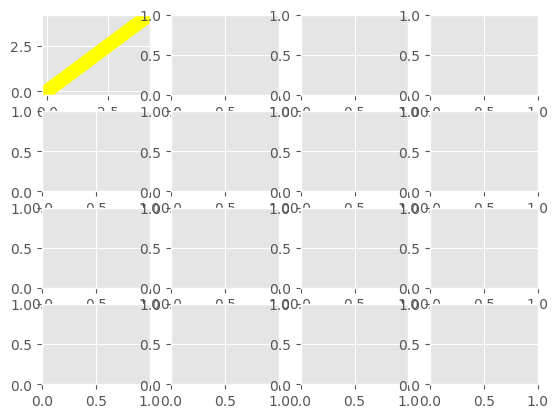

In [84]:
# something did happen. We just did not witness it
fig

### Unpacking Axes directly into variables
It's no fun invoking axes methods when the axes is inside a numpy array. It is uncommon to unpack the values of the array into separate variables on invocation of **`subplots`**

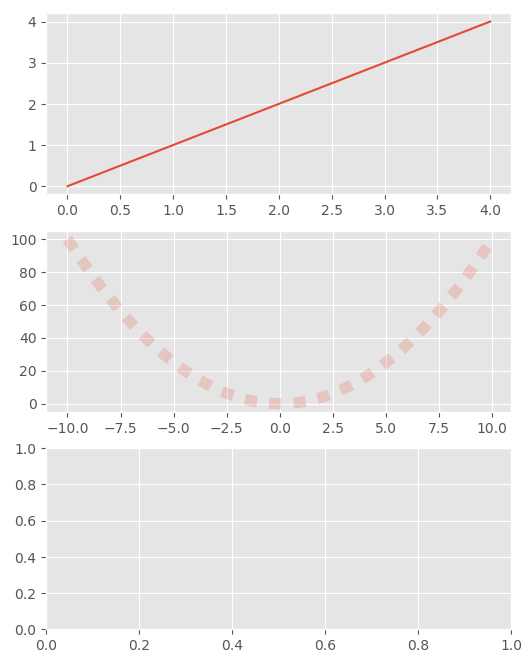

In [85]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(6,8))

ax1.plot(np.arange(5))

ax2.plot(np.arange(-10, 10, .1), np.arange(-10, 10, .1) ** 2, ls=":", lw=8, alpha=.2);

## nothing in last axes

### Using the dot notation to manipulate our matplotlib objects

Everything plotted can be manipulated using the object-oriented method. Let's take another look at the anatomy of a figure image. Every labeled object below you can grab onto and use the dot notation to change.

![new figure](./images/figure_parts.png)

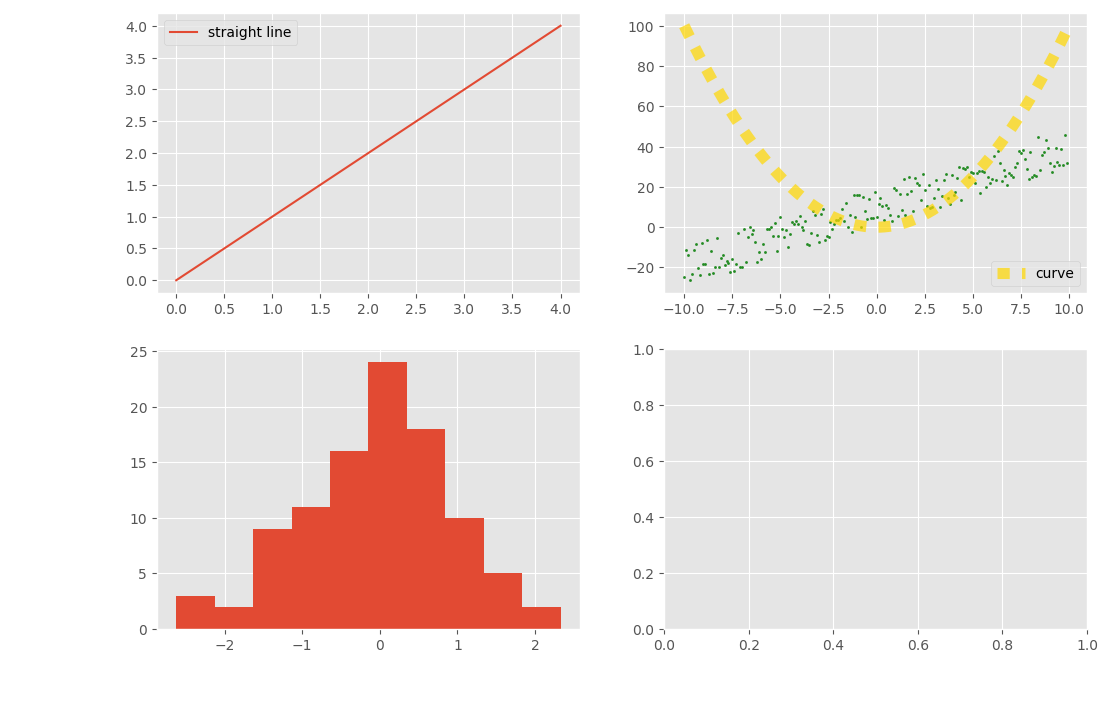

In [86]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,8))

ax1.plot(np.arange(5), label='straight line')
ax1.legend()

x = np.arange(-10, 10, .1)
ax2.plot(x, x ** 2, ls=":", lw=8, alpha=.7, label='curve', color='gold')
ax2.scatter(x, 3 * x + np.random.rand(len(x))*20, c='forestgreen', s=2.2)
ax2.legend()

ax3.hist(np.random.randn(100))

ax4.annotate('a hidden annotation', xy = (3, 4))

### All the Artists
Technically everything that is drawn is an artist. There is a single **Figure** above with 4 **Axes**. Each axes has some artists in common: **x-axis**, **y-axis**, and **x-ticks** and **y-ticks**. The axes also have different artists. The top row axes both have a **legend** and a **line**. That golden U-shaped square-dotted artist is technically a line drawn with a markers. 

The top right axes also contains a **scatterplot**. The bottom left axes contains a **histogram** and the bottom right **axes** contains some **text** which is rendered out of the current x and y limits.

Matplotlib can return all the artists for a given figure or axes with the **`get_children`** method.

In [87]:
# get all the artists on the figure
# returns a list of the artists
fig.get_children()

In [88]:
# get all the artists for an axes
ax1.get_children()

In [89]:
# some same and some different for ax2
ax2.get_children()

### So many methods
There are over 300 methods for an axes object. How do you know which one to choose to change?

In [90]:
len([a for a in dir(ax2) if a[0] != '_'])

323

### Modifying with `get_<attribute>` and `set_<attribute>`
You will mostly be calling methods that begin with **`set`** to modify some property of your artist. You can also call methods that begin with **`get`** to retrieve a property.

### Set the title of an axes
To change the title you can use the **`set_title`** method of the **`axes`** object. In **`pyplot`** this would have been done with function **`plt.title`** which would set the title of the current axes. In the object-oriented world, you must directly latch on to the axes and use the corresponding method.

In [91]:
ax1.set_title('Axes 1')
ax2.set_title('Axes 2: A scatterplot')
ax3.set_title('Axes 3')
ax4.set_title("Axes 4: Where's the text?")

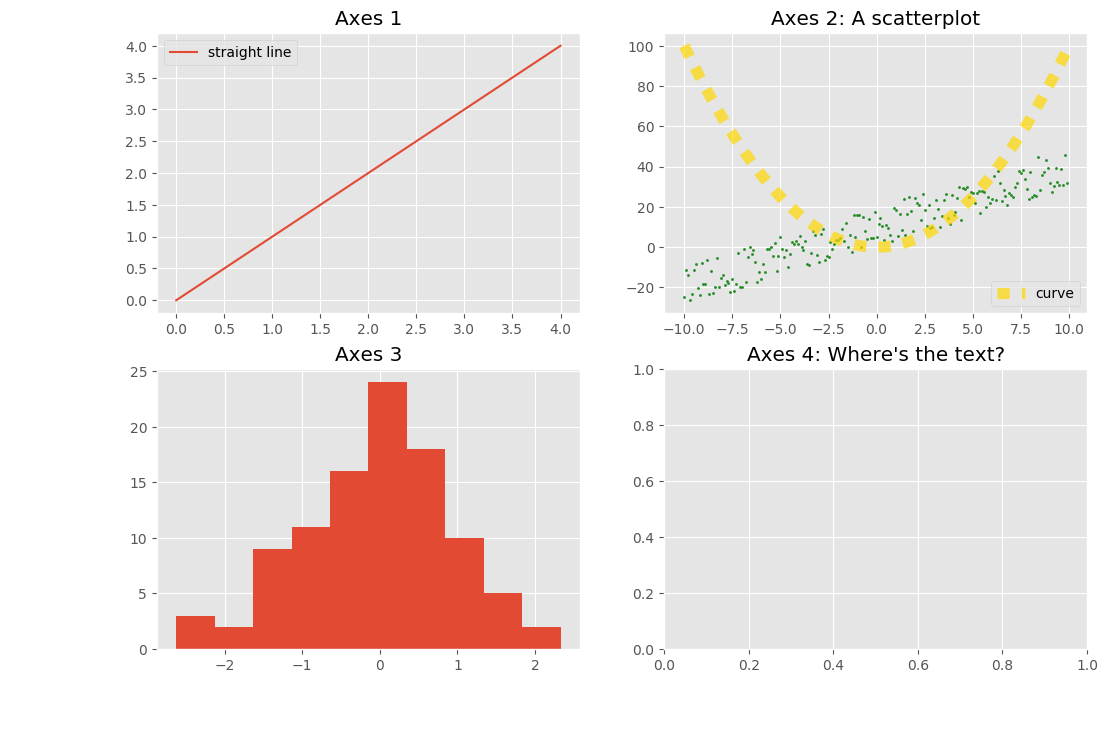

In [92]:
# you have to force the output by outputting the fig
fig

### Changing the legend label
The label for the legend in axes 2 was set during the **`plot`** method which creates a matplotlib line. Lets grab that line and change its **label**.

In [93]:
# this returns a list of lines
ax2.get_lines()

<a list of 1 Line2D objects>

In [94]:
# also retrieved with this
ax2.lines

In [95]:
# check that we have indeed found the label
line = ax2.lines[0]
line.get_label()

'curve'

In [96]:
# set the label
line.set_label('evurc')

# must call this to reset
ax2.legend()

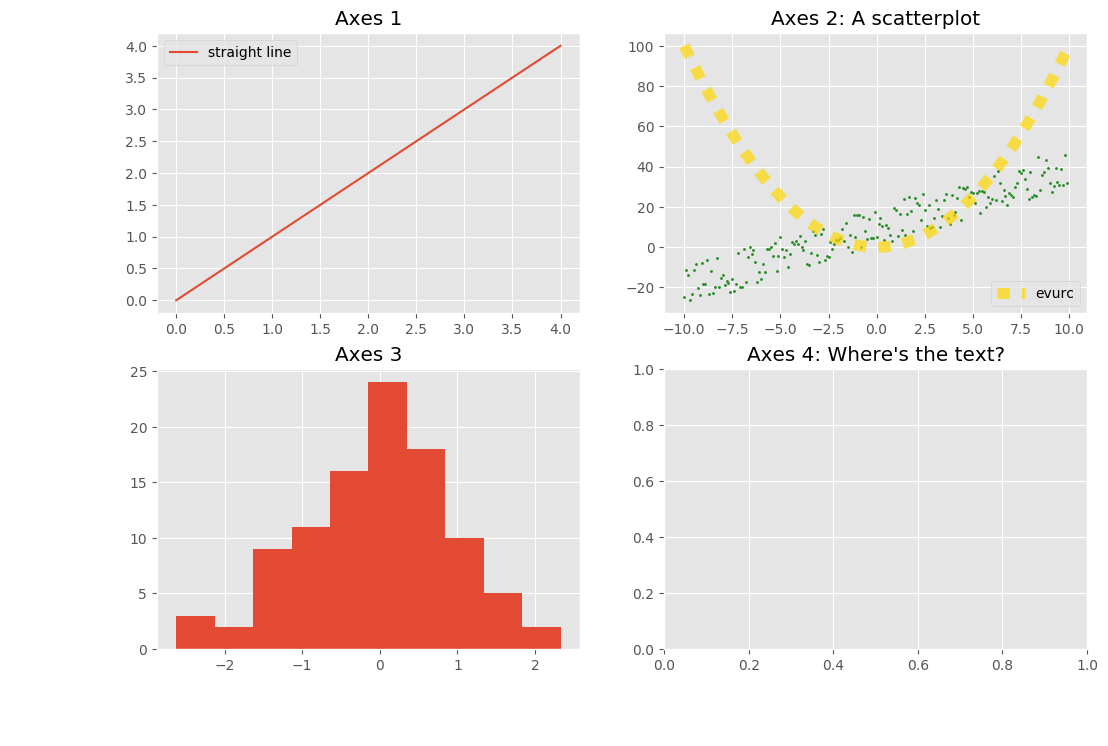

In [97]:
# check output
fig

### Change the colors of the histogram

The histogram is made up of an artist called **patches** (basically shapes). We will iterate through these rectangle patches and change every other ones color to green.

In [98]:
# see the patches
ax3.get_children()

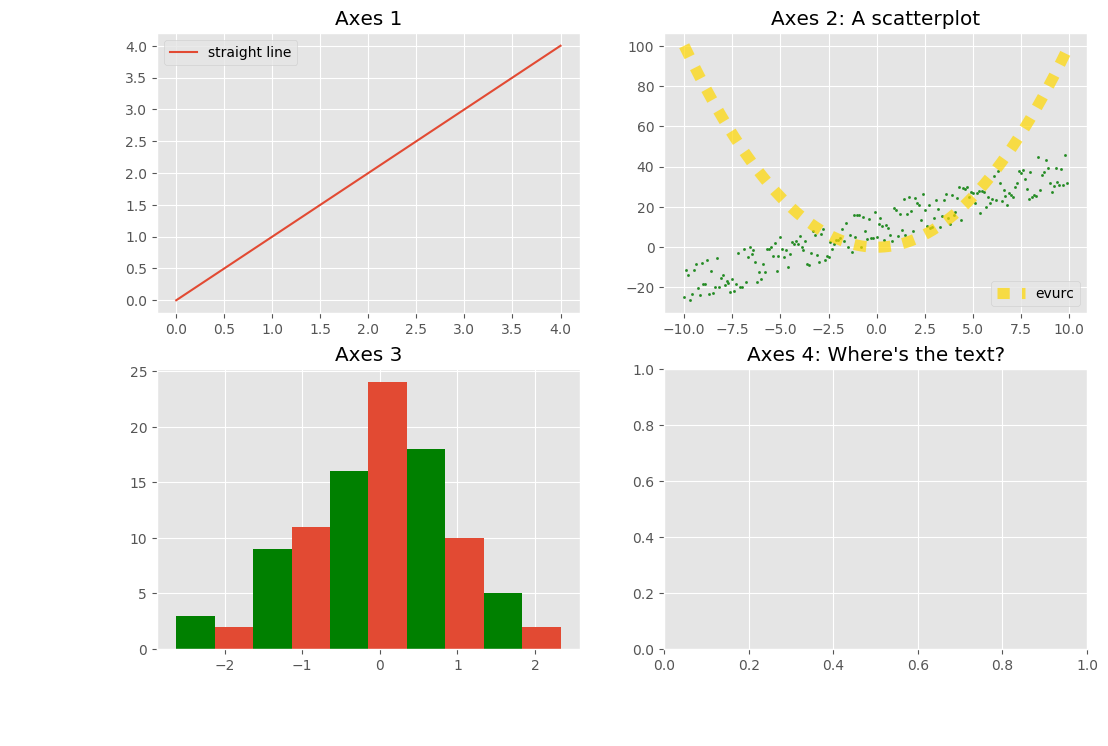

In [99]:
for patch in ax3.patches[::2]:
    patch.set_facecolor('green')
fig

### Adding a patch
Rectangles, circle, arcs, polygons, ellipses, arrows and more can be instantly added to your axes with a **patch**. Patches are not in **pyplot** and so you must import **matplotlib** by itself to have access to them.

In [100]:
import matplotlib

In [101]:
circle = matplotlib.patches.Circle((-2, 10), facecolor='orange', edgecolor='black', linewidth=3)

In [102]:
ax4.add_patch(circle)

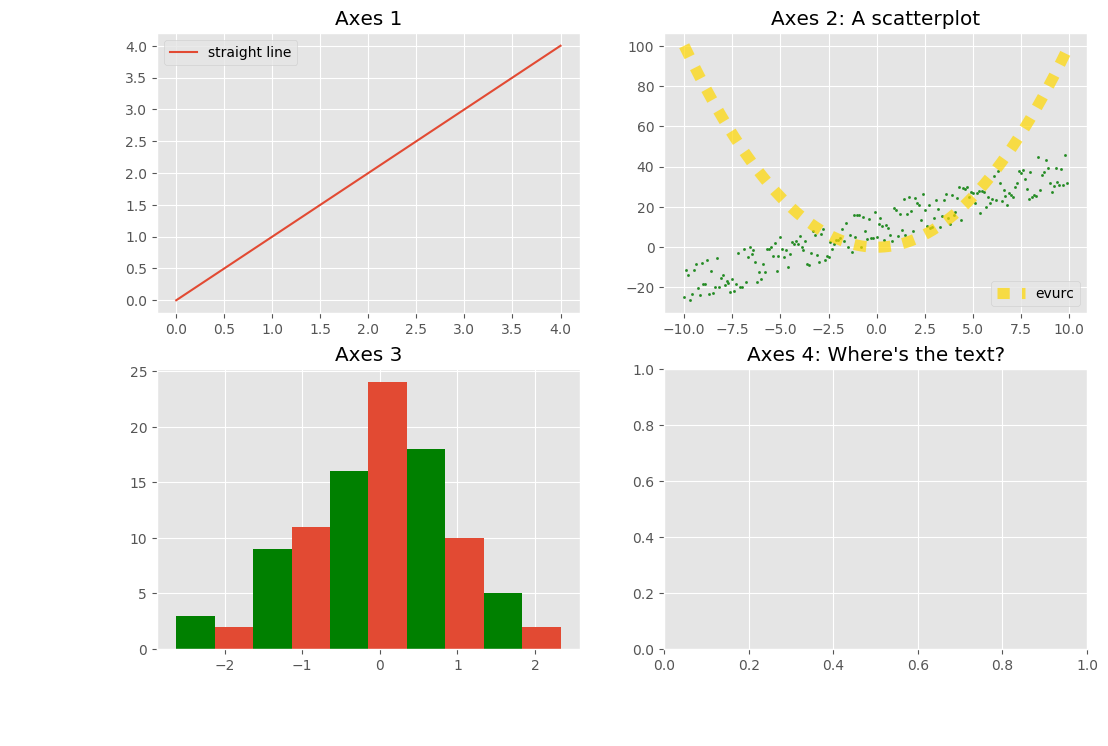

In [103]:
fig

### Where is the patch?
The patch was specified at (-2, 10) which is out of the limits of the x and y coordinates for the bottom right axes. Let's change those limits to make it visible.

In [104]:
ax4.set_xlim(-5,5)
ax4.set_ylim(0,12)

(0, 12)

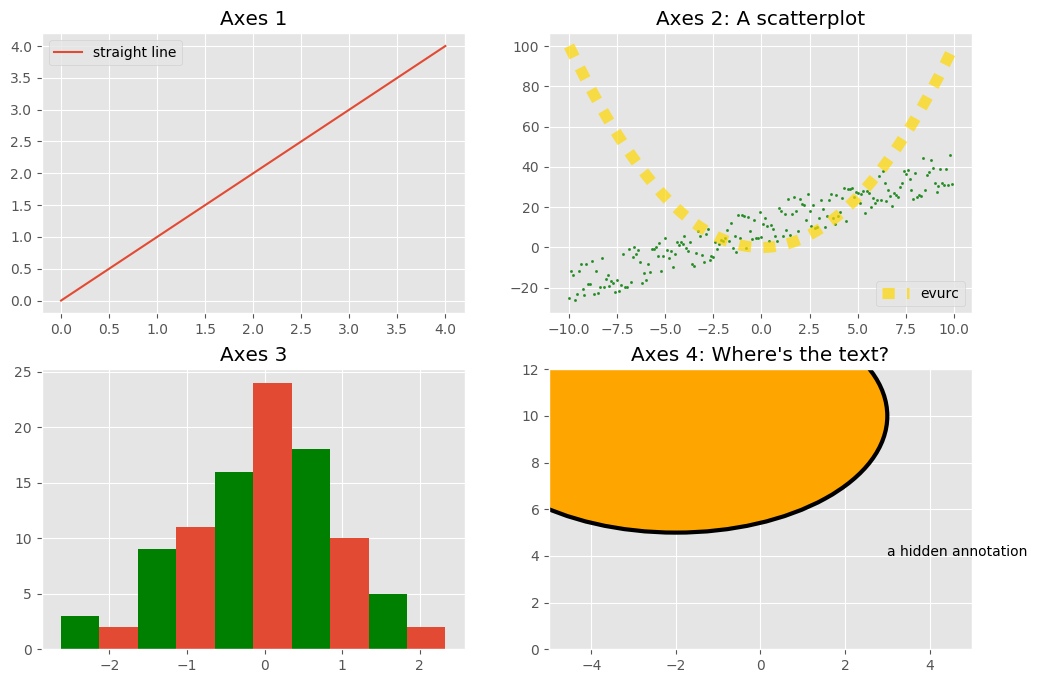

In [105]:
fig

### Pie Charts

There are many other types of plots that matplotlib provides. Let's use City of Houston data to create them

In [106]:
coh = pd.read_csv('data/coh_employee.csv')

pd.options.display.max_columns = 40

In [107]:
coh_gender = coh.GENDER.value_counts() / len(coh)
coh_gender

Male      0.6985
Female    0.3015
Name: GENDER, dtype: float64

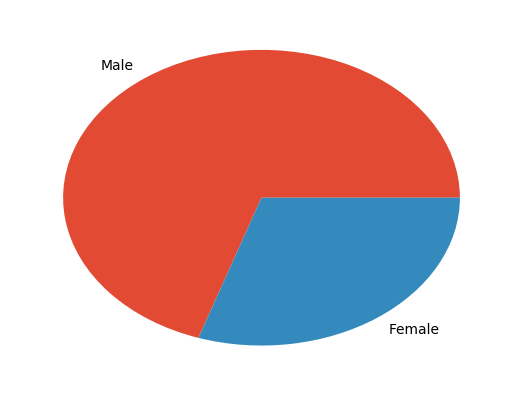

In [108]:
# pie chart with labels
plt.pie(coh_gender, labels=coh_gender.index);

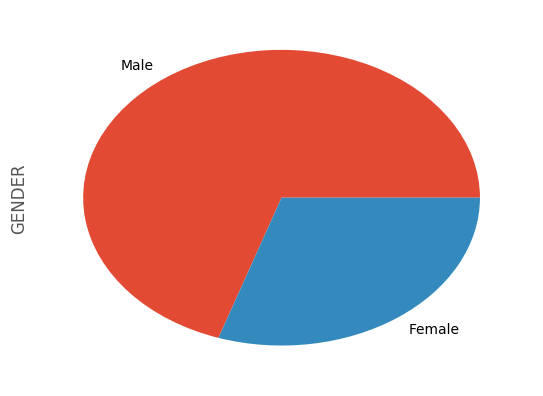

In [109]:
# of course this is possible directly with pandas
coh_gender.plot.pie()

# End of Section Summary
1. pandas can directly call matplotlib from Series/DataFrames with **`.plot`**
2. Use pandas_datareader to grab stock data
3. Change the type of plot with the **`kind`** argument
4. Know the most common plotting aguments in pandas - linestyle, color, linewidth, alpha, figsize
5. Change default plot style with plt.style.use
6. matplotlib's main api is through the pyploy module
7. Know the difference between a figure, axes and axis
8. plt.plot will continually add plots to the current axes
9. know how to quickly plot different colors, linestyles and multiple plots with plt.plot
10. Change figures with plt.figure
11. Create many new axes with plt.subplot and make current axes
12. Create many new axes with plt.subplots and fig.add_subplot
13. Access the object-oriented style of fig, ax


# Problem Set

### Problem 1
<span  style="color:green; font-size:16px">Use pandas to plot a horizontal bar plot of diamond cuts.</span>

In [110]:
# your code here

### Problem 2
<span  style="color:green; font-size:16px">Use matplotlib directly for this question. 

1. Create a 2 by 2 subplot grid of axes. In the upper left axes, plot a histogram of the closing prices of Apple's stock, 'AAPL'. Label the x and y axis.

2. In the upper right axes, draw a snowman with matplotlib patches.

3. In the middle left axes, draw a scatterplot of  100 points whose x and y coordinates are random normal values with mean 5 and standard deviation 2. Put a circle around the point furthest from the center of the distribution (5,5).

4. Plot the curves $y = x^2 - 3$ and $y = -x^2 +3$ and use the [fill the area](http://matplotlib.org/examples/pylab_examples/fill_between_demo.html) between the curves.

</span>

In [111]:
# your code here

### Problem 3
<span  style="color:green; font-size:16px">Use matplotlib directly to plot a horizontal bar plot of diamond cuts.</span>

In [112]:
# your code here

### Problem 4
<span  style="color:green; font-size:16px">Filter the diamonds dataframe for only the top three most frequently occurring values of clarity. Then use matplotlib directly to plot a vertical bar plot of all diamond cuts by the top 3 values of clarity. Make sure each value of clarity has a different color (but same color for each cut) and is labeled. Use a loop to iterate through the different clarity groups.</span>

In [113]:
# your code here

### Problem 5
<span  style="color:green; font-size:16px">We will make clever use of the iterability of a groupby object. For the city of Houston dataset, iterate through every RACE GENDER combination and plot a histogram using matplotlib of their base salary. Don't plot groups with less than 100 employees. Make the figure larger as well and make the limits of the x axis much smaller to capture the bulk of the data.</span>

In [114]:
# your code here

### Problem 6
<span  style="color:green; font-size:16px">Make a scatter plot of data where x and y are each 100 units in length with random values between 0 and 1. Make the size of the markers proportional to the ratio of y to x. Make the color proportional to y. Use object oriented notation.</span>

In [115]:
# your code here

### Problem 7
<span  style="color:green; font-size:16px">Calculate years of experience for city of Houston employees and make a scatter plot between years of experience and base salary. **`EXTRA CREDIT`**: Use [statsmodels](http://statsmodels.sourceforge.net/devel/index.html) to find a regression line and draw it through the points.</span>

In [116]:
# your code here

### Problem 8
<span  style="color:green; font-size:16px">Use the **`pd.cut`** function to create three categories of years of experience: 0-10, 10-20 and 20+ and make a pie chart.</span>

In [117]:
# your code here